# <font color='2A52BE'> **BAIGIAMASIS DARBAS**

## Problema

#### <font color='2A52BE'> *Išsiaiškinti, kiek patikima yra vėžio diagnostika ir koks(-ie) faktoriai gali turėti tam įtakos?*
1) Koks radiologinis metodas geriausiai atspindi realų naviko dydį:<br>
- Kuriuo radiologiniu metodu dydžio skirtumas mažiausias? Geriausiai koreliuoja su dydžiu po operacijos?<br>
- Ar situacija keičiasi, jei operacija atliekama kuo anksčiau?<br>
    
2) Ar biopsijos metu paimtos medžiagos kiekis (stulpelių skaičius) turi įtakos tikslesniam naviko tipo nustatymui?<br>

## Sprendimas

In [1]:
# Įkeliami duomenys

In [2]:
import os
import pandas as pd
import seaborn as sns
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
os.getcwd()

'C:\\Users\\Neringos-Yoga\\Desktop\\Python baigiamasis'

In [4]:
path = 'C:\\Users\\Neringos-Yoga\\Desktop\\Python baigiamasis\\Kruties vezys Python.csv'
cancer = pd.read_csv(path, sep = ';', engine='python', encoding = 'ISO-8859-13')

In [5]:
cancer.head()

,Amzius,Laiko tarpas iki operacijos (d.),Tipas po PB (1-duktalinė; 2- lobulinė; 3 - mišrus; 4 - mucininė; 5-tubulinė; 6-NET; 7-apokrinine; 8- papiline),Tipas po operacijos,G po PB,G po operacijos,Nothingam b. po PB,Nothingham b. po operacijos,Dydis MRT,Dydis MG,Dydis UG (mm),Dydis po oper.,Biopsiniu stulpeliu kiekis iš krūties,Stadija po operacijos,Stadija pries operacija,Taikyta neoadjuvantinė chemoterapija (1-ne; 2-taip)
0,51,19,2,2,2,2,6,6,x,x,7,18,3,2B,1A,1
1,48,20,1,1,3,3,9,x,x,59,20,30,x,2B,2A,1
2,61,26,1,1,2,2,x,6,x,25,20,23,4,2A,2A,1
3,37,186,1,x,3,x,8,x,x,x,15,x,2,x,2A,2
4,37,185,1,x,3,x,x,x,x,23,25,x,1,x,2B,2


In [6]:
# Pašalinama dalis nereikalingų duomenų (Nothingam balą dalinai atspindi G), su kuriais nebus dirbama
cancer = cancer.drop(['Nothingam b. po PB','Nothingham b. po operacijos'],axis=1)

In [7]:
#Pakeičiami stulpelių pavadinimai į trumpesnius/glaustesnius
cancer = cancer.rename(columns={'Amzius': "Amžius", 'Laiko tarpas iki operacijos (d.)': "Laiko intervalas", 'Tipas po PB (1-duktalinė; 2- lobulinė; 3 - mišrus; 4 - mucininė; 5-tubulinė; 6-NET; 7-apokrinine; 8- papiline)': 'Vėžio tipas po PB','Tipas po operacijos':'Vėžio tipas po operacijos','Dydis UG (mm)':'Dydis UG','Dydis po oper.':'Dydis po operacijos','Biopsiniu stulpeliu kiekis iš krūties':'PB stulpelių kiekis','Stadija pries operacija':'Stadija prieš operaciją', 'Taikyta neoadjuvantinė chemoterapija (1-ne; 2-taip)':'Neoadjuvantinė chemoterapija'})

In [8]:
cancer.head(2)

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija po operacijos,Stadija prieš operaciją,Neoadjuvantinė chemoterapija
0,51,19,2,2,2,2,x,x,7,18,3,2B,1A,1
1,48,20,1,1,3,3,x,59,20,30,x,2B,2A,1


**Trumpas duomenų paaiškinimas:**<br>

Amžius - paciento amžius<br>
Laiko intervalas - laiko intervalas tarp biopsijos ir operacijos (d.)<br>
Vėžio tipas po PB- krūties vėžio tipas po punkcinės biopsijos (PB):<br>
   1. duktalinė karcinoma (Ca);<br>
   2. lobulinė Ca;<br>
   3. mišrus vėžys;<br>
   4. mucininė Ca;<br>
   5. tubulinė Ca;<br>
   6. NET;<br>
   7. apokrininė Ca;<br>
   8. papilinė Ca.<br>

Vėžio tipas po operacijos - kintamieji analogiški nurodytiems "Vėžio tipas po PB"<br>
G po PB - diferenciacijos laipsnis (G) po PB:<br>
   1. gerai diferencijuotas navikas;<br>
   2. vidutinės diferenciacijos navikas;<br>
   3. blogai diferencijuotas navikas.<br>

G po operacijos - kintamieji analogiški nurodytiems "G po PB"<br>
Dydis MRT - naviko dydis magnetinio rezonanso tomografijos tyrime (mm)<br>
Dydis MG - naviko dydis mamografijos tyrime (mm)<br>
Dydis UG - naviko dydis ultragarso tyrime (mm)<br>
PB stulpelių kiekis - biopsinių stulpelių kiekis paimtas iš krūties naviko<br>
Neoadjuvantinė chemoterapija - ar taikytas chemoterapinis gydymas prieš operaciją:<br>
   1. ne;<br>
   2. taip.<br>

In [9]:
# Stadijų sugrupavimas į stambesnius vienetus
cancer['Stadija po operacijos'].unique()

array(['2B', '2A', 'x', '1A', '3C', '3A', '1B', '4', '3B', '0', '3'],
      dtype=object)

In [10]:
cancer['Stadija prieš operaciją'].unique()

array(['1A', '2A', '2B', 'x', nan, '3A', '3C', '3B', '4'], dtype=object)

In [11]:
cancer[['Stadija po operacijos', 'Stadija prieš operaciją']] = cancer[['Stadija po operacijos', 'Stadija prieš operaciją']].replace('0', 0)
cancer[['Stadija po operacijos', 'Stadija prieš operaciją']] = cancer[['Stadija po operacijos', 'Stadija prieš operaciją']].replace(['1A', '1B'], 1)
cancer[['Stadija po operacijos', 'Stadija prieš operaciją']] = cancer[['Stadija po operacijos', 'Stadija prieš operaciją']].replace(['2A', '2B'], 2)
cancer[['Stadija po operacijos', 'Stadija prieš operaciją']] = cancer[['Stadija po operacijos', 'Stadija prieš operaciją']].replace(['3A', '3B', '3C', '3'], 3)
cancer[['Stadija po operacijos', 'Stadija prieš operaciją']] = cancer[['Stadija po operacijos', 'Stadija prieš operaciją']].replace('4', 4)

In [12]:
cancer['Stadija po operacijos'].unique()

array([2, 'x', 1, 3, 4, 0], dtype=object)

In [13]:
cancer['Stadija prieš operaciją'].unique()

array([1, 2, 'x', nan, 3, 4], dtype=object)

In [14]:
#Pašalinimas neturimų reikšmių
cancer.columns

Index(['Amžius', 'Laiko intervalas', 'Vėžio tipas po PB',
       'Vėžio tipas po operacijos', 'G po PB', 'G po operacijos', 'Dydis MRT',
       'Dydis MG', 'Dydis UG', 'Dydis po operacijos', 'PB stulpelių kiekis',
       'Stadija po operacijos', 'Stadija prieš operaciją',
       'Neoadjuvantinė chemoterapija'],
      dtype='object')

In [15]:
def rename_x(data):
    columns_list = data.columns
    
    def iksai(x):
        if type(x) == str:
            x = x.strip().replace(',','.')
        if (x == 'x') or (x == '#VALUE!') or (x =='?'):
            x = None
        return x
               
    for column in columns_list:
        data[column] = data[column].apply(lambda x: iksai(x))
   
    return data

In [16]:
cancer = rename_x(cancer)

In [17]:
cancer.head()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija po operacijos,Stadija prieš operaciją,Neoadjuvantinė chemoterapija
0,51,19,2,2,2,2,None,None,7,18,3,2.0,1.0,1
1,48,20,1,1,3,3,None,59,20,30,None,2.0,2.0,1
2,61,26,1,1,2,2,None,25,20,23,4,2.0,2.0,1
3,37,186,1,None,3,None,None,None,15,None,2,NaN,2.0,2
4,37,185,1,None,3,None,None,23,25,None,1,NaN,2.0,2


In [18]:
#Object reikšmių sutvarkymas - mūsų atvejų tikslinga, kad duomenis traktuotų kaip skaitmenis
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 14 columns):
Amžius                          453 non-null int64
Laiko intervalas                450 non-null object
Vėžio tipas po PB               445 non-null object
Vėžio tipas po operacijos       425 non-null object
G po PB                         437 non-null object
G po operacijos                 410 non-null object
Dydis MRT                       26 non-null object
Dydis MG                        316 non-null object
Dydis UG                        405 non-null object
Dydis po operacijos             430 non-null object
PB stulpelių kiekis             452 non-null object
Stadija po operacijos           409 non-null float64
Stadija prieš operaciją         429 non-null float64
Neoadjuvantinė chemoterapija    450 non-null object
dtypes: float64(2), int64(1), object(11)
memory usage: 49.6+ KB


In [19]:
def skaiciai_float(data,column_index_start,column_index_end):
    columns_list = data.columns
            
    for column in columns_list[column_index_start:column_index_end]:
        data[column] = pd.to_numeric(data[column], downcast = 'float')
   
    return data

In [20]:
def skaiciai_int(data,column_index_start,column_index_end):
    columns_list = data.columns
            
    for column in columns_list[column_index_start:column_index_end]:
        data[column] = pd.to_numeric(data[column], errors='coerce', downcast = 'signed')
    return data

In [21]:
cancer = skaiciai_float(cancer,6,10)

In [22]:
cancer = skaiciai_int(cancer,1,6)
cancer = skaiciai_int(cancer,10,14)

In [23]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 14 columns):
Amžius                          453 non-null int64
Laiko intervalas                450 non-null float64
Vėžio tipas po PB               445 non-null float64
Vėžio tipas po operacijos       425 non-null float64
G po PB                         437 non-null float64
G po operacijos                 410 non-null float64
Dydis MRT                       26 non-null float32
Dydis MG                        316 non-null float32
Dydis UG                        405 non-null float32
Dydis po operacijos             430 non-null float32
PB stulpelių kiekis             452 non-null float64
Stadija po operacijos           409 non-null float64
Stadija prieš operaciją         429 non-null float64
Neoadjuvantinė chemoterapija    450 non-null float64
dtypes: float32(4), float64(9), int64(1)
memory usage: 42.5 KB


In [24]:
cancer.head()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija po operacijos,Stadija prieš operaciją,Neoadjuvantinė chemoterapija
0,51,19.0,2.0,2.0,2.0,2.0,NaN,NaN,7.0,18.0,3.0,2.0,1.0,1.0
1,48,20.0,1.0,1.0,3.0,3.0,NaN,59.0,20.0,30.0,NaN,2.0,2.0,1.0
2,61,26.0,1.0,1.0,2.0,2.0,NaN,25.0,20.0,23.0,4.0,2.0,2.0,1.0
3,37,186.0,1.0,NaN,3.0,NaN,NaN,NaN,15.0,NaN,2.0,NaN,2.0,2.0
4,37,185.0,1.0,NaN,3.0,NaN,NaN,23.0,25.0,NaN,1.0,NaN,2.0,2.0


In [25]:
#Pergrupuoju stulpelių eiliškumą
cancer.columns

Index(['Amžius', 'Laiko intervalas', 'Vėžio tipas po PB',
       'Vėžio tipas po operacijos', 'G po PB', 'G po operacijos', 'Dydis MRT',
       'Dydis MG', 'Dydis UG', 'Dydis po operacijos', 'PB stulpelių kiekis',
       'Stadija po operacijos', 'Stadija prieš operaciją',
       'Neoadjuvantinė chemoterapija'],
      dtype='object')

In [26]:
cancer = cancer[['Amžius', 'Laiko intervalas', 'Vėžio tipas po PB',
       'Vėžio tipas po operacijos', 'G po PB', 'G po operacijos', 'Dydis MRT',
       'Dydis MG', 'Dydis UG', 'Dydis po operacijos', 'PB stulpelių kiekis', 
        'Stadija prieš operaciją', 'Stadija po operacijos', 
       'Neoadjuvantinė chemoterapija']]

In [27]:
cancer.head()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija prieš operaciją,Stadija po operacijos,Neoadjuvantinė chemoterapija
0,51,19.0,2.0,2.0,2.0,2.0,NaN,NaN,7.0,18.0,3.0,1.0,2.0,1.0
1,48,20.0,1.0,1.0,3.0,3.0,NaN,59.0,20.0,30.0,NaN,2.0,2.0,1.0
2,61,26.0,1.0,1.0,2.0,2.0,NaN,25.0,20.0,23.0,4.0,2.0,2.0,1.0
3,37,186.0,1.0,NaN,3.0,NaN,NaN,NaN,15.0,NaN,2.0,2.0,NaN,2.0
4,37,185.0,1.0,NaN,3.0,NaN,NaN,23.0,25.0,NaN,1.0,2.0,NaN,2.0


**Duomenų apžvalga**

In [28]:
cancer.describe()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija prieš operaciją,Stadija po operacijos,Neoadjuvantinė chemoterapija
count,453.000000,450.000000,445.000000,425.000000,437.000000,410.000000,26.000000,316.000000,405.000000,430.000000,452.000000,429.000000,409.000000,450.000000
mean,57.883002,75.682222,1.417978,1.489412,2.116705,2.236585,22.134615,25.101265,21.621973,23.063488,3.387168,1.841492,1.877751,1.215556
std,13.058480,97.092906,1.103083,1.155588,0.580746,0.597573,16.005974,15.511667,12.951957,19.348244,1.283742,0.763081,0.785730,0.411665
min,28.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.900000,0.000000,1.000000,1.000000,0.000000,1.000000
25%,47.000000,25.000000,1.000000,1.000000,2.000000,2.000000,10.000000,15.000000,12.000000,11.500000,3.000000,1.000000,1.000000,1.000000
50%,57.000000,34.000000,1.000000,1.000000,2.000000,2.000000,19.000000,20.000000,19.000000,18.000000,3.000000,2.000000,2.000000,1.000000
75%,68.000000,65.750000,1.000000,2.000000,2.000000,3.000000,33.000000,30.000000,28.000000,28.750000,4.000000,2.000000,2.000000,1.000000
max,88.000000,908.000000,8.000000,8.000000,3.000000,3.000000,57.000000,80.000000,75.000000,160.000000,10.000000,4.000000,4.000000,2.000000


In [29]:
#Pašalinami duomenys, kai taikyta chemoterapija prieš operaciją, kad neiškreiptų naviko dydžio, morfologijos duomenų
salyga_no_neo = cancer['Neoadjuvantinė chemoterapija'] == 1
cancer_no_neo = cancer[salyga_no_neo]

In [30]:
cancer_no_neo.head()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija prieš operaciją,Stadija po operacijos,Neoadjuvantinė chemoterapija
0,51,19.0,2.0,2.0,2.0,2.0,NaN,NaN,7.000000,18.0,3.0,1.0,2.0,1.0
1,48,20.0,1.0,1.0,3.0,3.0,NaN,59.0,20.000000,30.0,NaN,2.0,2.0,1.0
2,61,26.0,1.0,1.0,2.0,2.0,NaN,25.0,20.000000,23.0,4.0,2.0,2.0,1.0
5,49,43.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,13.0,3.0,NaN,1.0,1.0
6,75,47.0,1.0,7.0,2.0,3.0,NaN,NaN,44.700001,11.0,5.0,NaN,1.0,1.0


In [31]:
cancer_no_neo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 353 entries, 0 to 452
Data columns (total 14 columns):
Amžius                          353 non-null int64
Laiko intervalas                353 non-null float64
Vėžio tipas po PB               346 non-null float64
Vėžio tipas po operacijos       352 non-null float64
G po PB                         340 non-null float64
G po operacijos                 346 non-null float64
Dydis MRT                       20 non-null float32
Dydis MG                        250 non-null float32
Dydis UG                        327 non-null float32
Dydis po operacijos             350 non-null float32
PB stulpelių kiekis             352 non-null float64
Stadija prieš operaciją         340 non-null float64
Stadija po operacijos           340 non-null float64
Neoadjuvantinė chemoterapija    353 non-null float64
dtypes: float32(4), float64(9), int64(1)
memory usage: 35.9 KB


**Pacientų, kuriems netaikyta chemoterapija, duomenų apžvalga**<br>

In [32]:
cancer_no_neo.describe()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija prieš operaciją,Stadija po operacijos,Neoadjuvantinė chemoterapija
count,353.000000,353.000000,346.000000,352.000000,340.000000,346.000000,20.000000,250.000000,327.000000,350.000000,352.000000,340.000000,340.000000,353.0
mean,59.611898,36.745042,1.497110,1.551136,2.029412,2.219653,18.225000,22.784000,19.662079,22.001997,3.474432,1.661765,1.773529,1.0
std,12.659643,33.263115,1.223558,1.239290,0.563663,0.588061,13.044937,13.323938,11.157385,15.022651,1.333087,0.678587,0.735853,0.0
min,32.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,3.900000,0.700000,1.000000,1.000000,1.000000,1.0
25%,50.000000,23.000000,1.000000,1.000000,2.000000,2.000000,9.750000,14.000000,11.100000,12.000000,3.000000,1.000000,1.000000,1.0
50%,59.000000,29.000000,1.000000,1.000000,2.000000,2.000000,15.750000,20.000000,17.000000,18.000000,3.000000,2.000000,2.000000,1.0
75%,69.000000,38.000000,2.000000,2.000000,2.000000,3.000000,22.500000,30.000000,26.000000,27.000000,4.000000,2.000000,2.000000,1.0
max,88.000000,331.000000,8.000000,8.000000,3.000000,3.000000,52.000000,80.000000,64.000000,95.000000,10.000000,4.000000,4.000000,1.0


In [33]:
#Suskaičiuojamas dydžio skirtumas priklausomai nuo skirtingo radiologinio metodo
dydzio_skirtumas_UG = cancer_no_neo['Dydis po operacijos'] - cancer_no_neo['Dydis UG']
dydzio_skirtumas_MG = cancer_no_neo['Dydis po operacijos'] - cancer_no_neo['Dydis MG']
dydzio_skirtumas_MRT = cancer_no_neo['Dydis po operacijos'] - cancer_no_neo['Dydis MRT']

In [34]:
cancer_no_neo.loc[:,'Dydžio skirtumas UG'] = dydzio_skirtumas_UG
cancer_no_neo.loc[:,'Dydžio skirtumas MG'] = dydzio_skirtumas_MG
cancer_no_neo.loc[:,'Dydžio skirtumas MRT'] = dydzio_skirtumas_MRT

C:\Users\Neringos-Yoga\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Neringos-Yoga\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [35]:
cancer_no_neo.head()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija prieš operaciją,Stadija po operacijos,Neoadjuvantinė chemoterapija,Dydžio skirtumas UG,Dydžio skirtumas MG,Dydžio skirtumas MRT
0,51,19.0,2.0,2.0,2.0,2.0,NaN,NaN,7.000000,18.0,3.0,1.0,2.0,1.0,11.000000,NaN,NaN
1,48,20.0,1.0,1.0,3.0,3.0,NaN,59.0,20.000000,30.0,NaN,2.0,2.0,1.0,10.000000,-29.0,NaN
2,61,26.0,1.0,1.0,2.0,2.0,NaN,25.0,20.000000,23.0,4.0,2.0,2.0,1.0,3.000000,-2.0,NaN
5,49,43.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,13.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN
6,75,47.0,1.0,7.0,2.0,3.0,NaN,NaN,44.700001,11.0,5.0,NaN,1.0,1.0,-33.700001,NaN,NaN


In [36]:
#Reikia tik absoliučių reikšmių
cancer_no_neo['Dydžio skirtumas UG'] = cancer_no_neo['Dydžio skirtumas UG'].abs()
cancer_no_neo['Dydžio skirtumas MG'] = cancer_no_neo['Dydžio skirtumas MG'].abs()
cancer_no_neo['Dydžio skirtumas MRT'] = cancer_no_neo['Dydžio skirtumas MRT'].abs()

C:\Users\Neringos-Yoga\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Neringos-Yoga\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Neringos-Yoga\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

**Pacientų, kuriems netaikyta chemoterapija, duomenų apžvalga su dydžių skirtumais**<br>

In [74]:
cancer_no_neo.describe()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija prieš operaciją,Stadija po operacijos,Neoadjuvantinė chemoterapija,Dydžio skirtumas UG,Dydžio skirtumas MG,Dydžio skirtumas MRT
count,353.000000,353.000000,346.000000,352.000000,340.000000,346.000000,20.000000,250.000000,327.000000,350.000000,352.000000,340.000000,340.000000,353.0,325.000000,248.000000,20.000000
mean,59.611898,36.745042,1.497110,1.551136,2.029412,2.219653,18.225000,22.784000,19.662079,22.001997,3.474432,1.661765,1.773529,1.0,6.028306,6.582661,8.809999
std,12.659643,33.263115,1.223558,1.239290,0.563663,0.588061,13.044937,13.323938,11.157385,15.022651,1.333087,0.678587,0.735853,0.0,7.677471,8.014976,16.246487
min,32.000000,4.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,3.900000,0.700000,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,0.000000
25%,50.000000,23.000000,1.000000,1.000000,2.000000,2.000000,9.750000,14.000000,11.100000,12.000000,3.000000,1.000000,1.000000,1.0,1.700000,2.000000,2.150000
50%,59.000000,29.000000,1.000000,1.000000,2.000000,2.000000,15.750000,20.000000,17.000000,18.000000,3.000000,2.000000,2.000000,1.0,3.700001,4.000000,3.000000
75%,69.000000,38.000000,2.000000,2.000000,2.000000,3.000000,22.500000,30.000000,26.000000,27.000000,4.000000,2.000000,2.000000,1.0,7.000000,7.250000,5.125000
max,88.000000,331.000000,8.000000,8.000000,3.000000,3.000000,52.000000,80.000000,64.000000,95.000000,10.000000,4.000000,4.000000,1.0,64.000000,59.000000,70.000000


In [75]:
#Pašalinamos reikšmės, kurių neturime ir kurios bus naudojamos skaičiavimams
cancer_no_neo_no_na_UG = cancer_no_neo.dropna(subset= ["Dydis po operacijos", "Dydis UG",'Laiko intervalas'])
cancer_no_neo_no_na_MG = cancer_no_neo.dropna(subset= ["Dydis po operacijos", "Dydis MG",'Laiko intervalas'])
cancer_no_neo_no_na_MRT = cancer_no_neo.dropna(subset= ["Dydis po operacijos", "Dydis MRT",'Laiko intervalas'])

**Dydžių skirtumų pasiskirstymas, priklausomai nuo radiologinio tyrimo**

Kiekybinių duomenų pasiskirstymas, todėl pasirinktas dėžės-ūso (box-whiskers) grafikas

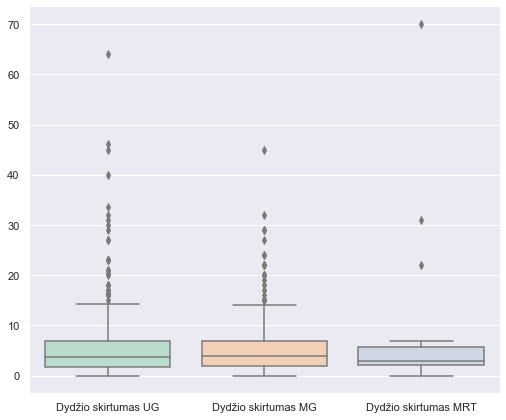

In [152]:
sns.catplot(data=cancer_no_neo_no_na_UG[['Dydžio skirtumas UG',
                                         'Dydžio skirtumas MG',
                                         'Dydžio skirtumas MRT']], kind='box', height = 6, aspect = 1.2, palette = "Pastel2")

#Interkvartilinis plotis pakankamai mažas ir didžioji dalis duomenų patenka į skirtumą, kuris mažesnis už 15 mm, kas yra nedidelė matavimo paklaida
#Tačiau UG ir MG duomenys turi daug išskirčių
#MRT duomenų nedidelis kiekis, nedaug išskirčių, tačiau esančios labai nutolusios

**Dydžio skirtumas priklausomai nuo laiko tarpo iki operacijos**

*UG metodas*

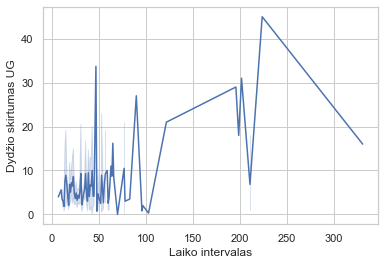

In [172]:
sns.set(style="whitegrid")
sns.lineplot(y='Dydžio skirtumas UG', x='Laiko intervalas',
             data=cancer_no_neo_no_na_UG,
            sizes=(10, 200))

#Mažiausi dydžio nesutapimai (skirtumai) matomi tada, kai intervalas nuo UG tyimo iki operacijos trumpas
#Išvada: jei operacija atliekama iki ~1,5 mėn. mažėja tikimybė, kad naviko dydis skirsis nuo nustatyto UG

*MG tyrimas*

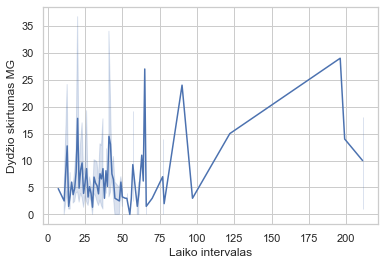

In [171]:
sns.lineplot(y='Dydžio skirtumas MG', x='Laiko intervalas',
             data = cancer_no_neo_no_na_MG,
            sizes=(10, 200))
#MG tyrimu dydžio skirtumai kiek didesni esant ir mažesniems intervalams, tačiau didžiausias skirtumas iki 30 mm, o UG iki virš 40 mm

*MRT tyrimas*

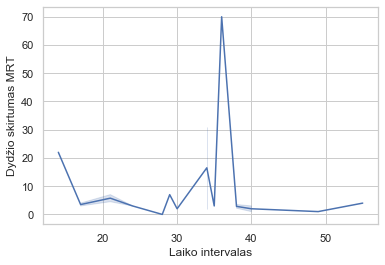

In [173]:
sns.lineplot(y='Dydžio skirtumas MRT', x='Laiko intervalas',
             data = cancer_no_neo_no_na_MRT,
            sizes=(10, 200))

#Nedidelė imtis, pasiskirstymas labai netolygus, numatyti tendenciją sudėtinga

**Dydžio nustatyto radiologiniais tyrimais ir po operacijos koreliacija atsižvelgiant į laiko tarpą nuo UG tyrimo iki operacijos**

Duomenys tolydūs - naudota scatteerplot grafikų tipas vizualizacijai.<br>
Koreliacija tikrinta naudojant Pearson koreliacijos koeficientą, nes dydžiai turėtų turėti tiesinę priklausomybę.

*UG tyrimas*

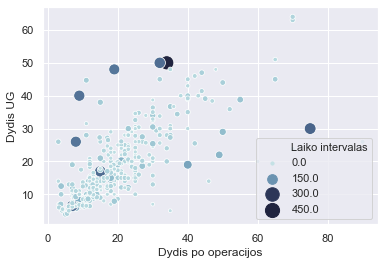

In [168]:
#Dydis UG ir po operacijos su laiko intevalu
sns.set(style="darkgrid")
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Dydis po operacijos", y="Dydis UG",
                     hue='Laiko intervalas', size = 'Laiko intervalas',
                     palette=cmap, sizes=(10, 200),
                     data=cancer_no_neo_no_na_UG)


#Panasu, kad kuo ilgesnis laikas nuo diagnostikos iki operacijos, tuo didesnis dydžių neatitikimas

*MG tyrimas*

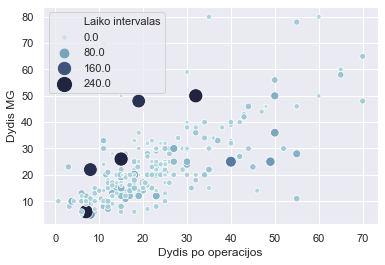

In [54]:
#Dydis MG ir po operacijos su laiko intevalu
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Dydis po operacijos", y="Dydis MG",
                     hue='Laiko intervalas', size = 'Laiko intervalas',
                     palette=cmap, sizes=(10, 200),
                     data=cancer_no_neo_no_na_MG)

#Panasu, kad kuo ilgesnis laikas nuo diagnostikos iki operacijos, tuo didesnis dydziu neatitikimas

*MRT tyrimas*

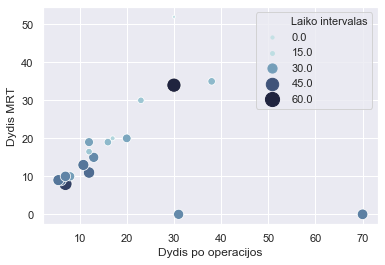

In [55]:
#Dydis MRT ir po operacijos su laiko intevalu
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
ax = sns.scatterplot(x="Dydis po operacijos", y="Dydis MRT",
                     hue='Laiko intervalas', size = 'Laiko intervalas',
                     palette=cmap, sizes=(10, 200),
                     data=cancer_no_neo_no_na_MRT)

#Mažas duomenų skaičius, duomenų tendencijos neatsiskleidžia, kelios labiausiai nutolusios reikšmės 
#stebimos tada, kai navikas MRT buvo visai nevizualizuotas (dydis=0)

*UG, MG, MRT tyrimų dydžių koreliacija su pooperaciniu dydžiu ir tarpusavyje*

In [147]:
corrMatt = cancer_no_neo_no_na_UG[["Dydis po operacijos","Dydis UG","Dydis MG","Dydis MRT"]].corr(method="pearson")
corrMatt.style.background_gradient(cmap='PuBuGn').set_precision(2)

#Geriausiai koreliuoja MG, panasiai UG su dydziu po operacijos

,Dydis po operacijos,Dydis UG,Dydis MG,Dydis MRT
Dydis po operacijos,1,0.7,0.74,0.16
Dydis UG,0.7,1,0.75,0.28
Dydis MG,0.74,0.75,1,0.86
Dydis MRT,0.16,0.28,0.86,1


In [77]:
#Paruošiami duomenys analizuoti tipus ir stulpelių skaičių

In [85]:
#Pašaliname neturimas reikšmes
cancer_no_neo_tipas_no_na = cancer_no_neo.dropna(subset= ['Vėžio tipas po PB', 'Vėžio tipas po operacijos', 'PB stulpelių kiekis'])

In [86]:
#Sukuriame atskirą stulpelį, kuriame nurodyta, ar tipas po operacijos sutampa su preliminariai nustatytu tipu po PB
rezultato_sarasas = []
for x, y in zip(cancer_no_neo_tipas_no_na['Vėžio tipas po PB'], cancer_no_neo_tipas_no_na['Vėžio tipas po operacijos']):
    if x == y:
        rezultato_sarasas.append(1)
    else:
        rezultato_sarasas.append(0)
cancer_no_neo_tipas_no_na['Tipas sutampa'] = rezultato_sarasas

C:\Users\Neringos-Yoga\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [87]:
cancer_no_neo_tipas_no_na.head()

,Amžius,Laiko intervalas,Vėžio tipas po PB,Vėžio tipas po operacijos,G po PB,G po operacijos,Dydis MRT,Dydis MG,Dydis UG,Dydis po operacijos,PB stulpelių kiekis,Stadija prieš operaciją,Stadija po operacijos,Neoadjuvantinė chemoterapija,Dydžio skirtumas UG,Dydžio skirtumas MG,Dydžio skirtumas MRT,Tipas sutampa
0,51,19.0,2.0,2.0,2.0,2.0,NaN,NaN,7.000000,18.0,3.0,1.0,2.0,1.0,11.000000,NaN,NaN,1
2,61,26.0,1.0,1.0,2.0,2.0,NaN,25.0,20.000000,23.0,4.0,2.0,2.0,1.0,3.000000,2.0,NaN,1
5,49,43.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,13.0,3.0,NaN,1.0,1.0,NaN,NaN,NaN,1
6,75,47.0,1.0,7.0,2.0,3.0,NaN,NaN,44.700001,11.0,5.0,NaN,1.0,1.0,33.700001,NaN,NaN,0
7,73,34.0,1.0,1.0,2.0,2.0,NaN,14.0,10.000000,13.0,3.0,1.0,1.0,1.0,3.000000,1.0,NaN,1


**Biopsijų sutapimo skaičius**

In [117]:
print('Iš viso biopsijų atlikta iš {} navikų.'.format(cancer_no_neo_tipas_no_na['Tipas sutampa'].count()))

Iš viso biopsijų atlikta iš 344 navikų.


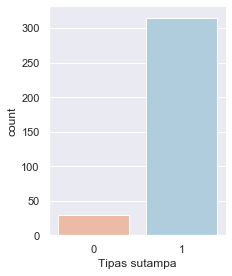

In [149]:
sns.catplot(x='Tipas sutampa', kind ='count', data=cancer_no_neo_tipas_no_na, height = 4, aspect = 0.8, palette = "RdBu")
#Didžioji dalis tipų nustatyti tinkamai prieš operaciją

**Vidutinis biopsinių stulpelių skaičius, kai tipas sutampa ir nesutampa**

In [94]:
cancer_no_neo_tipas_no_na.groupby(['Tipas sutampa'])['PB stulpelių kiekis'].mean()

#Tipas nepriklauso nuo biopsinių stulpelių skaičiaus(abiejose kategorijose vidurkis panašus)
#Negalima teigti, kad gydytojui reiketu imti daugiau stulpeliu didesniam sutapimo kiekiui pasiekti

Tipas sutampa
0    3.689655
1    3.431746
Name: PB stulpelių kiekis, dtype: float64

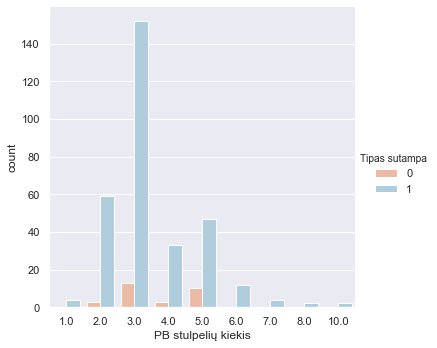

In [150]:
sns.catplot(x='PB stulpelių kiekis', 
            hue='Tipas sutampa',
            kind="count",
            data=cancer_no_neo_tipas_no_na, palette = "RdBu");

#Nuo 6 stulpeliu visi tipai sutampa, gal vertetu galvoti apie didesni stulpeliu kieki? Reikėtų įvertinti naudos-žalos santykį

In [116]:
salyga12 = cancer_no_neo_tipas_no_na['PB stulpelių kiekis'] > 5
salyga12_skaicius = len(cancer_no_neo_tipas_no_na[salyga12])
print('Daugiau nei 5 stulpeliai paimti iš {} navikų.'.format(salyga12_skaicius), end='')
salyga12_proc = (salyga12_skaicius * 100/cancer_no_neo_tipas_no_na['PB stulpelių kiekis'].count())
print('Tai sudaro {:.1f} % visų atvejų.'.format(salyga12_proc))

Daugiau nei 5 stulpeliai paimti iš 20 navikų.Tai sudaro 5.8 % visų atvejų.


## Išvados

1) Kuo didesnis laiko tarpas nuo UG ar MG ištyrimo iki operacijos, tuo dydžių (nustatytų prieš ir po operacijos) nesutapimas didesnis. MRT tyrimo vertinti patikimai negalima dėl mažos imties. <br>
2) MG tyrimo metodas tiksliausiai nustato realų naviko dydį, UG antras pagal tikslumą.<br> 
3) Biopsijos metu paimtų stulpelių kiekis neturi įtakos tikslesniam naviko tipo nustatymui, nors esant didesniam nei 5 stulpelių kiekiui, visi tipai buvo nustatyti 100 proc. tikslumu.<br>